# Exercice 2

## 1.
On va utiliser une régression linéaire car les données semblent linéaires.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

          0         1
0 -0.758388 -0.060828
1 -0.396523  0.463450
2 -0.357705  0.328412
3  0.837456  0.477808
4 -0.669818 -0.001956


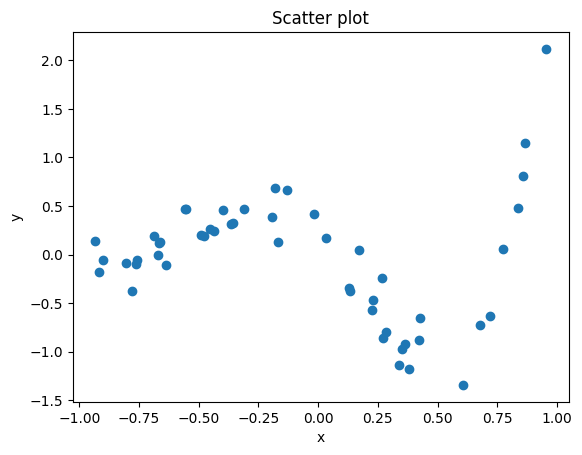

In [45]:
df = pd.read_csv("data.csv", header=None)
df = df.transpose()
print(df.head())

# plot the data
plt.scatter(df[0], df[1])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot")
plt.show()

## 2. résolution scickit-learn

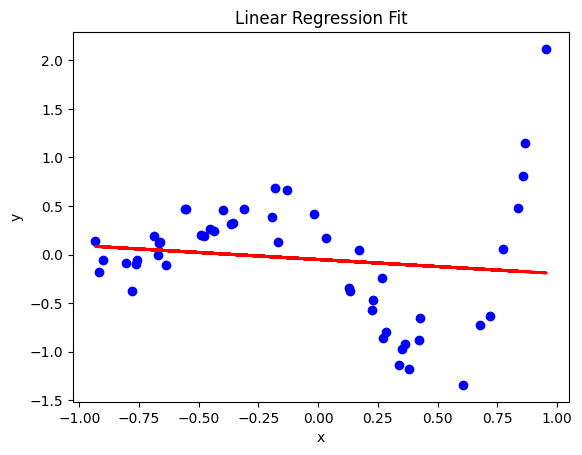

In [46]:
from sklearn.linear_model import LinearRegression

X = df[[0]].values  # feature matrix
y = df[1].values    # target vector
model = LinearRegression()
model.fit(X, y)

# plot the regression line
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.show()


En utilisant un polynome

Mean Squared Error (degree 4): 0.034816125070825536


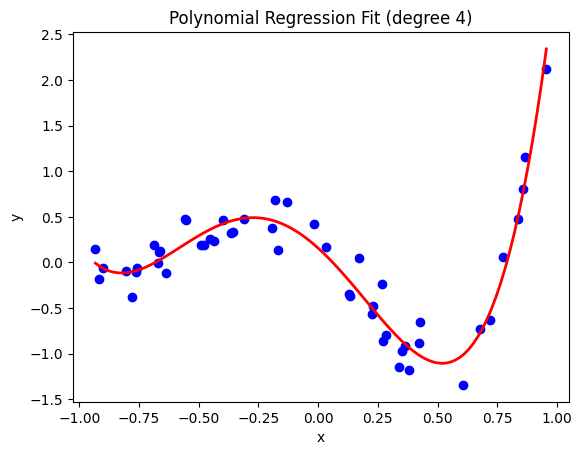

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

degree = 4

poly = PolynomialFeatures(degree=degree, include_bias=True)
X = poly.fit_transform(df[[0]].values)
y = df[1].values

reg = LinearRegression().fit(X, y)
error = np.mean((reg.predict(X) - y) ** 2)
print(f"Mean Squared Error (degree {degree}):", error)


x_range = np.linspace(df[0].min(), df[0].max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(x_range)
y_range_pred = reg.predict(X_range_poly)

# plot the polynomial regression fit
plt.scatter(df[0], df[1], color='blue')
plt.plot(x_range, y_range_pred, color='red', linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Polynomial Regression Fit (degree {degree})")
plt.show()

## 3. Polynome de Legendre

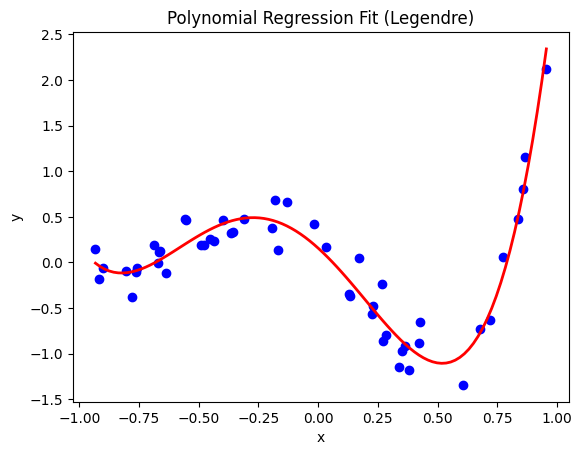

In [47]:
from sklearn.linear_model import LinearRegression
from scipy.special import eval_legendre
import numpy as np

degree = 4

x_values = df[0].values
X_poly_list = []
for x in x_values:
    row = []
    for d in range(degree + 1):
        poly_value = eval_legendre(d, x)
        row.append(poly_value)
    X_poly_list.append(row)
X_poly = np.array(X_poly_list)

y = df[1].values
model_poly = LinearRegression()
model_poly.fit(X_poly, y)


# This creates a range of x-values for plotting or prediction purposes
x_range = np.linspace(df[0].min(), df[0].max(), 100)
# Same as above but for the range
X_range_poly_list = []
for x in x_range:
    row = []
    for d in range(degree + 1):
        poly_value = eval_legendre(d, x)
        row.append(poly_value)
    X_range_poly_list.append(row)
X_range_poly = np.array(X_range_poly_list)


# plot the polynomial regression line
plt.scatter(df[0], df[1], color='blue')
plt.plot(x_range, model_poly.predict(X_range_poly), color='red', linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Regression Fit (Legendre)")
plt.show()

# Exercice 3

## 1.

In [ ]:
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True)

